In [1]:
import s3fs
import os
import os.path
import netCDF4
import matplotlib.pyplot as plt
import xarray as xr
import rasterio
import rioxarray
import geopandas as gpd
from shapely.geometry import mapping

In [2]:
# Adjust the variable inputs to create the prefix for the file of interest
bucket_name = 'noaa-goes16' # Change to 'noaa-goes17' for GOES-17 satellite
product_name = 'ABI-L2-LSTC'# Choose a GOES-R ABI L2+ product 
                             # See 'https://docs.opendata.aws/noaa-goes16/cics-readme.html'for GOES-R Series products
year = 2021 
day_of_year = 4 
hour = 20

# Adjust pathname to local directory
directory = "/Users/daniellelosos/GOESforGIS/"

In [3]:
# Make new directories to store files
if not os.path.isdir(directory + product_name +"_netCDFs"):
    os.mkdir(directory + product_name +"_netCDFs")
if not os.path.isdir(directory + product_name +"_Clipped_GeoTIFFs"):
    os.mkdir(directory + product_name +"_Clipped_GeoTIFFs")

In [4]:
# Use anonymous credentials to access public data  from AWS
fs = s3fs.S3FileSystem(anon=True)

# Write prefix for the files of interest, and list all files beginning with this prefix.
prefix = f'{bucket_name}/{product_name}/{year}/{day_of_year:03.0f}/{hour:02.0f}/'
print(prefix)
files = fs.ls(prefix)

noaa-goes16/ABI-L2-LSTC/2021/004/20/


In [5]:
#Read the first netCDF file in the list (closest to the top of the hour) and download
first_file = files[0]
path = directory + product_name +"_netCDFs/" + first_file.split("/")[-1]
fs.download(first_file, path)

[None]

In [6]:
f = netCDF4.Dataset(path,'r')

# Choose the first variable/subdataset in the netCDF file to convert to a GeoTIFF.
# To select altnative variable stored in the file, adjust the list number, ie. [0] selects the 1st variable 
var = list(f.variables.keys())[0] 
print ("Selected variable: " + var)

# Uncomment the line below to reveal the list of variables stored in the file
#print(list(f.variables.keys()))

Selected variable: LST


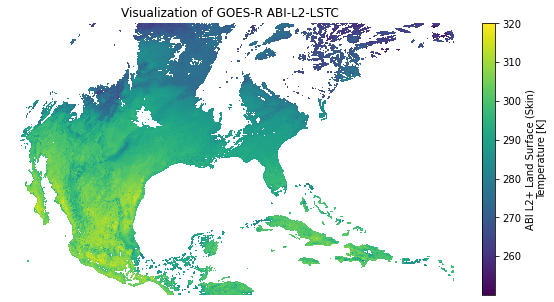

In [7]:
# Plot the variable to check if data loaded correctly
ds = xr.open_dataset(path)
fig, ax = plt.subplots(figsize=(10, 5))
ds[var].plot(ax=ax)
ax.set(title="Visualization of GOES-R " + product_name)
ax.set_axis_off()
plt.show()

In [8]:
# Open shapefile with geopandas and view attributes
# Download the state border shapefile from:
# 'https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html'
us_state_borders = gpd.read_file('/Users/daniellelosos/GOESforGIS/cb_2018_us_state_5m/cb_2018_us_state_5m.shp')
us_state_borders

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05351 41.15726, -104.05267 41.2..."
1,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217..."
2,35,00897535,0400000US35,35,NM,New Mexico,00,314196306401,728776523,"POLYGON ((-109.05017 31.48000, -109.04984 31.4..."
3,46,01785534,0400000US46,46,SD,South Dakota,00,196346981786,3382720225,"POLYGON ((-104.05770 44.99743, -104.05021 44.9..."
4,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"POLYGON ((-106.64548 31.89867, -106.64084 31.9..."
5,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60337 33.47810, -118.5987..."
6,21,01779786,0400000US21,21,KY,Kentucky,00,102279490672,2375337755,"MULTIPOLYGON (((-89.40565 36.52817, -89.39869 ..."
7,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.73571 41.60336, -82.71880 ..."
8,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
9,13,01705317,0400000US13,13,GA,Georgia,00,149482048342,4422936154,"POLYGON ((-85.60516 34.98468, -85.55259 34.984..."


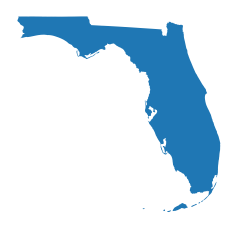

In [9]:
# If desired, select geometry subset by editing the field (ie.'NAME') and value (ie.'Florida')
state_border = us_state_borders[us_state_borders['NAME'] == 'Florida']

# Visualize selected geometry
f, ax = plt.subplots(1, figsize=(4, 4))
ax = state_border.plot(ax=ax)
ax.set_axis_off()
plt.show()

In [15]:
# Open netCDF file with rasterio
netCDF_file = xr.open_rasterio('netcdf:{0}:{1}'.format(path, var))

# Reproject shapefile to match the GOES-R geostationary projection
goesR_crs = netCDF_file.crs
print(goesR_crs)
reprojected_border = state_border.to_crs(goesR_crs)

+proj=geos +lon_0=-75 +h=35786023 +x_0=0 +y_0=0 +ellps=GRS80 +units=m +no_defs=True


In [ ]:
# Clip netCDF file to the boundary of the shapefile geometry 
file_clipped = netCDF_file.rio.clip(reprojected_border.geometry.apply(mapping))

In [ ]:
# Write a path for the new GeoTIFF file
clipped_name = product_name + "_" + var +".tif"
geotiff_pathname = os.path.join(directory + product_name +"_Clipped_GeoTIFFs", clipped_name)

# Store the new GeoTIFF at local directory path
file_clipped.rio.to_raster(geotiff_pathname)
print("\n" + geotiff_pathname + " has been generated")